In [ ]:
# 1. Kasus yang diambil adalah Email Spam Detection
# 2. Penjelasan setiap kolomnya
# Dataset ini berisi 5.158 pesan teks unik, dengan distribusi kategori. 
# Mayoritas pesan adalah ham (87%) 
# Minoritas pesan adalah spam (13%)
# Ada kemungkinan 1 data tidak terklasifikasi dengan jelas (Other)
# 3. Import library
# 4. Load data

In [12]:
## Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from wordcloud import WordCloud

In [8]:
# 4. Load data
df = pd.read_csv("email (1).csv", encoding='latin-1')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Jumlah baris dan kolom data: (5573, 3)
Panjang rata-rata setiap baris: 80.48
Jumlah data duplikat: 415

Jumlah data kosong per kolom:
Category       0
Message        0
text_length    0
dtype: int64


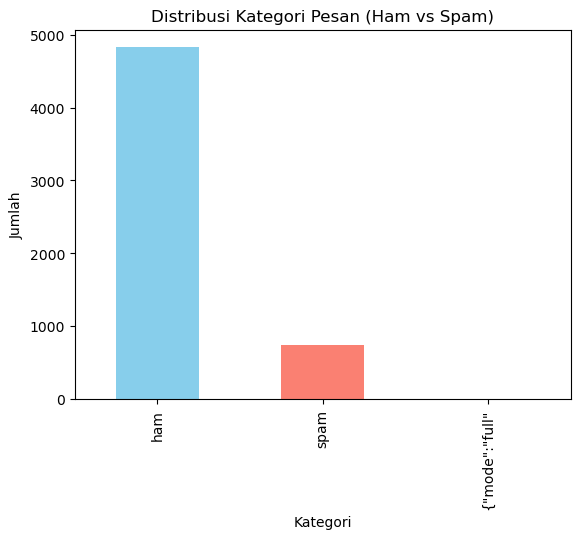

In [14]:
# DATA UNDERSTANDING
# 1. Jumlah baris dan kolom data
print("Jumlah baris dan kolom data:", df.shape)

# 2. Panjang rata-rata setiap baris (kolom teks)
df['text_length'] = df['Message'].apply(len)
avg_length = df['text_length'].mean()
print("Panjang rata-rata setiap baris:", round(avg_length, 2))

# 3. Cek data duplikasi
duplicates = df.duplicated().sum()
print("Jumlah data duplikat:", duplicates)

# 4. Cek data kosong (missing values)
print("\nJumlah data kosong per kolom:")
print(df.isnull().sum())

# 5. Distribusi data kategori (bar chart)
label_counts = df['Category'].value_counts()
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribusi Kategori Pesan (Ham vs Spam)")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.show()


In [ ]:
print("=== LABEL CATEGORY Percentage ===")
label_counts = df['Category'].value_counts()
label_percentages = df['Category'].value_counts(normalize=True) * 100

label_summary = pd.DataFrame({
    'Count': label_counts,
    'Percentage': label_percentages
})
print(label_summary)


=== LABEL CATEGORY Percentage ===
          Count  Percentage
Category                   
ham        4825   86.593683
spam        747   13.406317


In [5]:
import pandas as pd
df = pd.read_csv("email (1).csv", encoding='latin-1')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
ham_df = df[df['Category'] == 'ham']
spam_df = df[df['Category'] == 'spam']

target_ratio = 0.6  
spam_count = len(spam_df)
ham_sample_count = int(spam_count / (1 - target_ratio) * target_ratio)
ham_sampled = ham_df.sample(n=ham_sample_count, random_state=42)
resampled_df = pd.concat([ham_sampled, spam_df])
resampled_df = resampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
label_counts = resampled_df['Category'].value_counts()
label_percentages = resampled_df['Category'].value_counts(normalize=True) * 100

label_summary = pd.DataFrame({
    'Count': label_counts,
    'Percentage': label_percentages.round(2)
})

print("=== LABEL CATEGORY Percentage ===")
print(label_summary)


=== LABEL CATEGORY Percentage ===
          Count  Percentage
Category                   
ham        1120       59.99
spam        747       40.01


In [ ]:
# Data Text Processing
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan
# catatan (lakukan tahap 1- 5 apabila diperlukan, jika tidak langsung ke bagian 6-9)

In [18]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
nltk.download('punkt', download_dir='C:/nltk_data')
nltk.download('stopwords', download_dir='C:/nltk_data')
nltk.download('wordnet', download_dir='C:/nltk_data')

# Tambahkan path agar NLTK bisa menemukannya
nltk.data.path.append('C:/nltk_data')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karlina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karlina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karlina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:/nltk_data...


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('stopwords', download_dir='C:/nltk_data')
nltk.download('wordnet', download_dir='C:/nltk_data')
nltk.data.path.append('C:/nltk_data')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Text Normalization
    text = text.lower()                                 
    text = re.sub(r'[^a-z\s]', '', text)                
    text = re.sub(r'\s+', ' ', text).strip()            
    
    # Tokenization 
    tokens = text.split()
    
    # Stopword Removal 
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization 
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Stemming (opsional)
    tokens = [stemmer.stem(word) for word in tokens]
    
    return " ".join(tokens)

    
df['cleaned_text'] = df['Message'].apply(clean_text)

# Tampilkan 5 hasil awal
print(df[['Message', 'cleaned_text']].head())



[nltk_data] Downloading package stopwords to C:/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                             Message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                        cleaned_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4           nah dont think go usf life around though  


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.layers import TextVectorization, Embedding

# LABELING DATA
df = pd.read_csv("email (1).csv", encoding='latin-1')
df['Category'] = df['Category'].str.strip().str.lower()
df['label_enc'] = df['Category'].map({'ham': 0, 'spam': 1})
print("Jumlah label kosong:", df['label_enc'].isna().sum())
df = df.dropna(subset=['label_enc'])
print("\n=== Contoh Label Encoding ===")
print(df[['Category', 'label_enc']].head())



Jumlah label kosong: 1

=== Contoh Label Encoding ===
  Category  label_enc
0      ham        0.0
1      ham        0.0
2     spam        1.0
3      ham        0.0
4      ham        0.0


In [10]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

print(df.columns)

# TEXT VEKTORISASI
df = df.dropna(subset=['cleaned_text', 'label_enc'])  

X = np.array(df['cleaned_text'])
y = np.array(df['label_enc'])

tfidf_vec = TfidfVectorizer()
X_tfidf = tfidf_vec.fit_transform(X)

print("\n=== TF-IDF Matrix Shape ===")
print(X_tfidf.shape)


Index(['Category', 'Message', 'label_enc', 'cleaned_text'], dtype='object')

=== TF-IDF Matrix Shape ===
(5572, 7121)


In [8]:
print(df.columns)
print(df.head())


Index(['Category', 'Message', 'label_enc'], dtype='object')
  Category                                            Message  label_enc
0      ham  Go until jurong point, crazy.. Available only ...        0.0
1      ham                      Ok lar... Joking wif u oni...        0.0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        1.0
3      ham  U dun say so early hor... U c already then say...        0.0
4      ham  Nah I don't think he goes to usf, he lives aro...        0.0


In [10]:
y = df['Category'].map({'ham':0, 'spam':1})


In [ ]:
import pandas as pd
import re
df = pd.read_csv("email (1).csv", encoding='latin-1')

def clean_text(text):
    text = text.lower()  
    text = re.sub(r'[^a-z\s]', '', text)  
    text = re.sub(r'\s+', ' ', text)  
    return text.strip()

df['cleaned_text'] = df['Message'].apply(clean_text)  


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['cleaned_text']
y = df['Category'].map({'ham':0, 'spam':1})

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)


In [17]:
print(df.columns)

Index(['Category', 'Message', 'cleaned_text'], dtype='object')


In [ ]:

df = df.dropna(subset=['Category'])
df = df[df['Category'].isin(['ham', 'spam'])]
y = df['Category'].map({'ham':0, 'spam':1})
print(y.isna().sum())  
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

# Data Spliting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

# Train Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_test)

# Evaluasi
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("Akurasi:", round(accuracy_score(y_test, y_pred)*100,2), "%")


0

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Akurasi: 96.86 %


In [ ]:
#DATA MODELING
#Model yang digunakan sebelumnya adalah Naive Bayes (MultinomialNB).
#Naive Bayes cocok untuk klasifikasi teks, karena bekerja dengan frekuensi kata atau representasi TF-IDF.

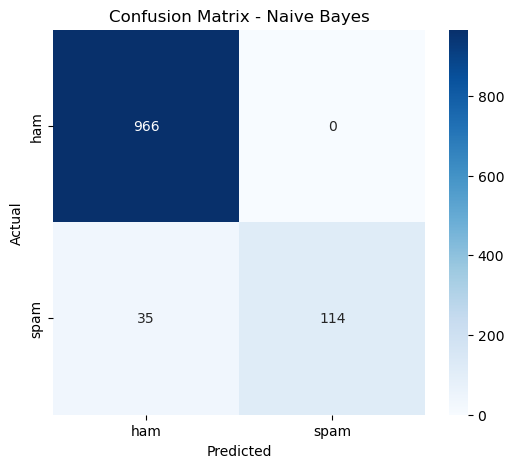

In [20]:
# 1. Confussion Matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi dengan heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham','spam'], yticklabels=['ham','spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


In [21]:
# Laporann Klasifikasi (Classification report)
from sklearn.metrics import classification_report, accuracy_score

# Laporan klasifikasi
report = classification_report(y_test, y_pred, target_names=['ham','spam'])
print("=== Classification Report ===")
print(report)

# Akurasi
print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")


=== Classification Report ===
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Akurasi: 96.86 %


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Buat dictionary untuk menyimpan model
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear')
}

# Simpan hasil evaluasi
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc


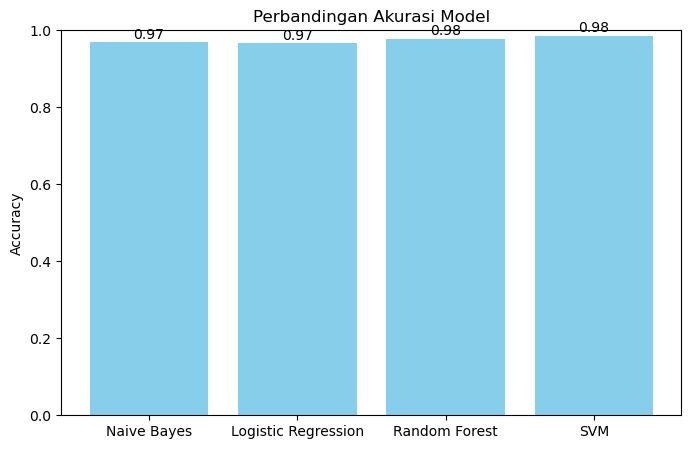

In [23]:
import matplotlib.pyplot as plt

# Nama model dan akurasinya
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(8,5))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model")
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()
